# Задача 12

Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов, c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [68]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, metrics
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 24
%matplotlib inline

In [6]:
data = pd.read_csv('data.txt', sep=',')

В нашей задаче у нас всего 13 признаков

In [7]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Посмотрим на распределение по классам

In [67]:
print("Class 1", np.sum(data['Class']==1))
print("Class 2", np.sum(data['Class']==2))
print("Class 3", np.sum(data['Class']==3))

Class 1 59
Class 2 71
Class 3 48


In [8]:
y = data['Class']
X = data.drop('Class', axis=1)

Разделив данные на тренировучную и тестовую часть, выделяем 30% под тестовую

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=50)

In [109]:
mistakes = [[],[],[]] #здесь будем хранить все ошибки от трех классификаторов с разными метриками
max_neigbors=int(len(X_train)/2) #для улучшения масштаба и так как имеем небольшое количесвто данных,ограничим кол-во соседей

                                                        Евклидово ядро

In [110]:
for neighbors in range(3, max_neigbors):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric="euclidean")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    mistakes[0].append((y_pred != y_test).sum())

                                                          Чебышево ядро


In [111]:
for neighbors in range(3, max_neigbors):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric="chebyshev")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    mistakes[1].append((y_pred != y_test).sum())

                                                     Миньковское ядро(p=1,3,7)


In [101]:
for neighbors in range(3, max_neigbors):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric="minkowski", p=1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    mistakes[2].append((y_pred != y_test).sum())

In [ ]:
def plot_metrics(minkovsky):
    plt.figure(figsize=(9, 9))
    plt.plot(range(3, max_neigbors), mistakes[0], color='red', label="euclidean")
    plt.plot(range(3, max_neigbors), mistakes[1], color='black', label="chebyshev")
    plt.plot(range(3, max_neigbors), mistakes[2], color='green', label="minkovsky p=%d"%minkovsky)
    plt.xlabel('neighbors')
    plt.ylabel('mistakes')
    plt.legend(loc='upper right')
    plt.title("Сравнение трех метрик")
    plt.show()

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


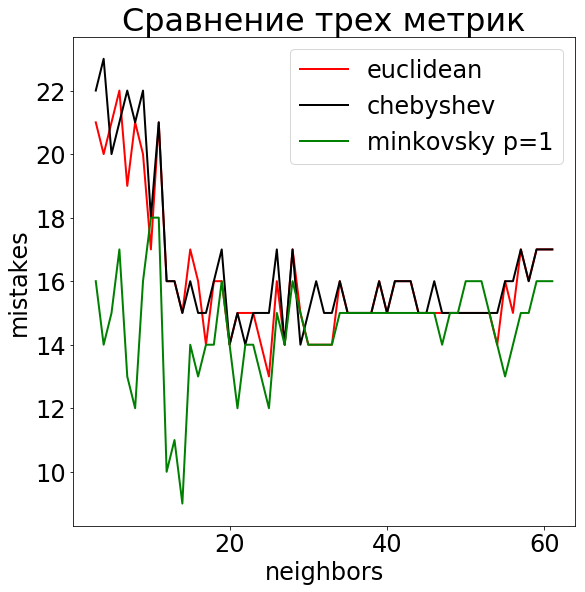

In [96]:
plot_metrics(1)

График с метрикой миньковского при суммме модулей резко уходит вниз(мнимум при neighbours~17)

In [106]:
for neighbors in range(3, max_neigbors):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric="minkowski", p=3)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    mistakes[2].append((y_pred != y_test).sum())

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


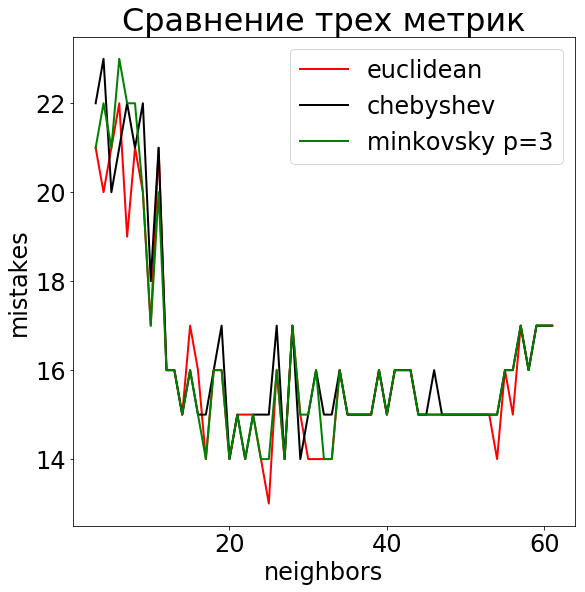

In [108]:
plot_metrics(3)

Если параметр метрики Миньковского равен 3, то наблюдается минимум при neighbours~24

In [112]:
for neighbors in range(3, max_neigbors):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric="minkowski", p=7)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    mistakes[2].append((y_pred != y_test).sum())

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


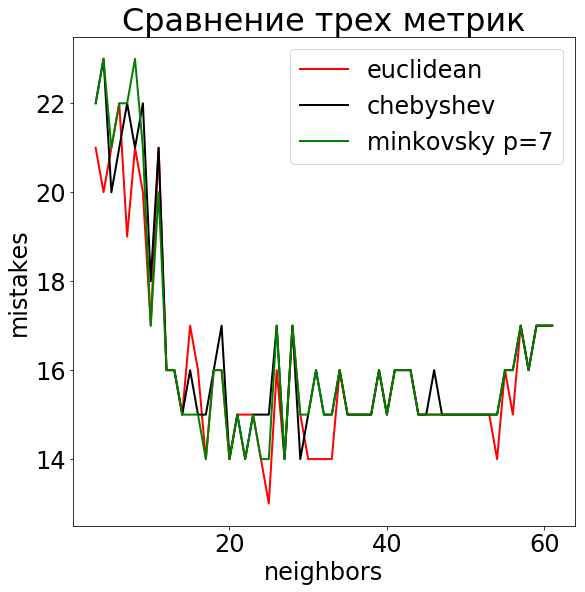

In [113]:
plot_metrics(7)

При p=7 ситуация не изменилась-минимум достигается при neighbours~24